In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

Drawing a Rectangle

In [ ]:
#cv2.rectangle(image, pt1, pt2, color, thickness=None)
#pt1: Top-left corner of the rectangle
#pt2: Bottom-right corner of the rectangle

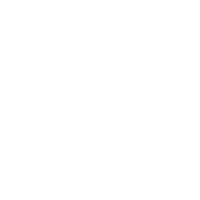

In [ ]:
i=np.ones((200,200),dtype='uint8')*255
cv2_imshow(i)

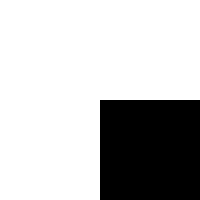

In [ ]:
rect=cv.rectangle(i.copy(),(100,100),(200,200),0,-1)
cv2_imshow(rect)

Drawing a Circle

In [ ]:
#cv2.circle(image, center, radius, color, thickness=None, lineType=None, shift=None)

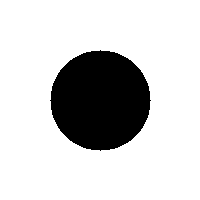

In [ ]:
circ=cv.circle(i.copy(),(100,100),50,0,-1)
cv2_imshow(circ)

THRESHOLDING

Original Image:


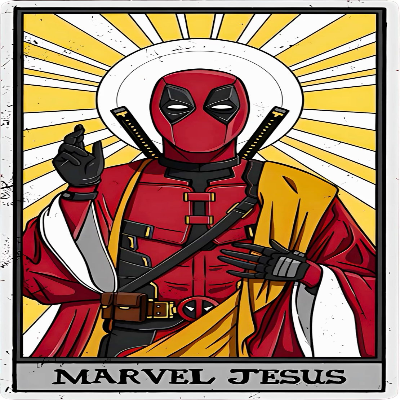

Grayscale Image:


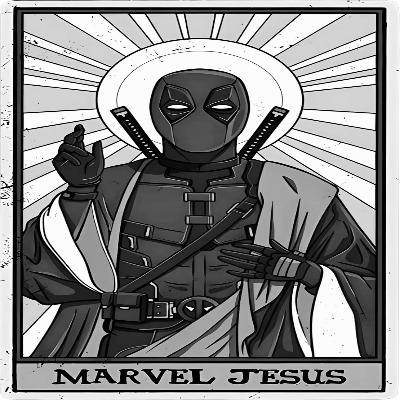

In [ ]:
imge = cv.imread('/content/marvel jesus.jpg')
imge = cv.resize(imge, (400, 400))
print("Original Image:")
cv2_imshow(imge)
#Converting to grayscale
imge = cv.cvtColor(imge, cv.COLOR_BGR2GRAY)
print("Grayscale Image:")
cv2_imshow(imge)




Global Thresholding (127):


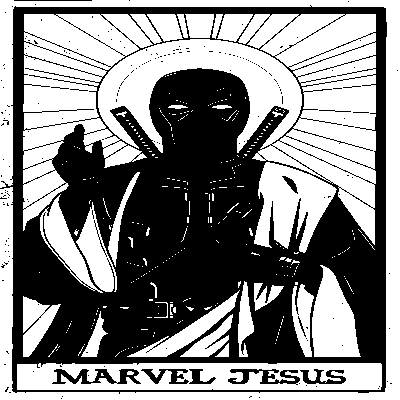

In [ ]:
#Global Thresholding
_, global_thresh = cv.threshold(imge, 127, 255, cv.THRESH_BINARY)#Performs global thresholding, converting the image (imge) into a binary image with a fixed threshold value of 127. Pixels above this value are set to 255 (white), and below are set to 0 (black).
print("Global Thresholding (127):")
cv2_imshow(global_thresh)

Adaptive Mean Thresholding:


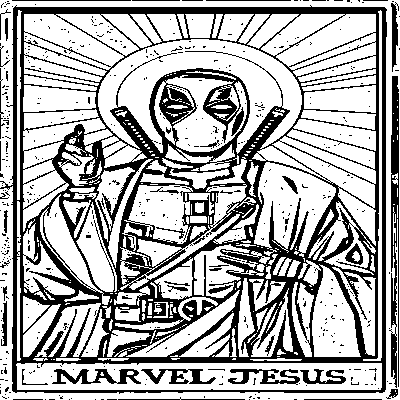

In [ ]:
#Adaptive Mean Thresholding
mean_thresh = cv.adaptiveThreshold(imge, 255, cv.ADAPTIVE_THRESH_MEAN_C,#Applies adaptive thresholding using the mean of neighboring pixel values (blockSize) to determine the threshold for each pixel. A constant C is subtracted from the mean.
                                    cv.THRESH_BINARY, blockSize=11, C=2)
print("Adaptive Mean Thresholding:")
cv2_imshow(mean_thresh)

Adaptive Gaussian Thresholding:


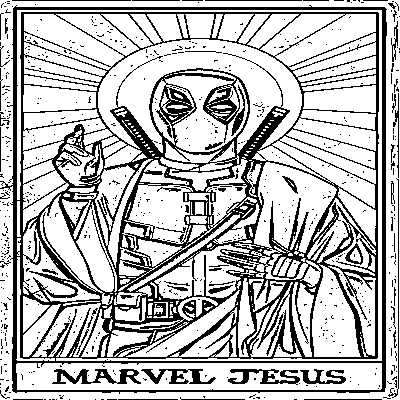

In [ ]:

#Adaptive Gaussian Thresholding
gaussian_thresh = cv.adaptiveThreshold(imge, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, #Applies adaptive thresholding using a weighted sum (Gaussian filter) of neighboring pixel values to compute the threshold for each pixel. A constant C is subtracted from this value.
                                        cv.THRESH_BINARY, blockSize=11, C=2)
print("Adaptive Gaussian Thresholding:")
cv2_imshow(gaussian_thresh)

BITWISE OPERATIONS

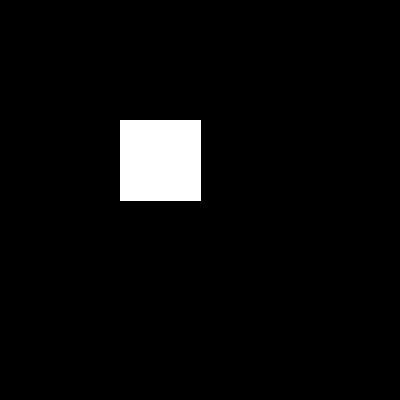

-1

In [ ]:
blank = np.zeros((400,400), dtype='uint8')
whiterect=cv.rectangle(blank.copy(),(120,120),(200,200),255,-1)
circle = cv.circle(blank.copy(), (200,200), 90,255, -1)
cv2_imshow(whiterect)
bitwisenot=cv.bitwise_not(whiterect)#Performs a pixel-wise NOT operation on a single image, inverting its binary values. Pixels with value 1 become 0, and 0 becomes 1.



cv.waitKey(0)

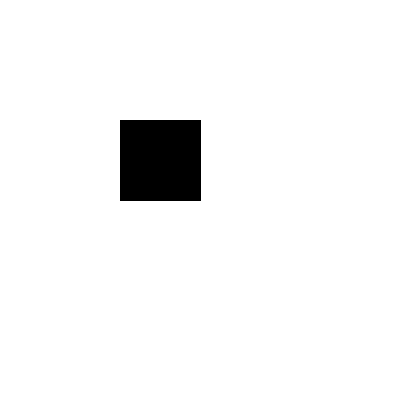

In [ ]:
#bitwise_not
cv2_imshow(bitwisenot)

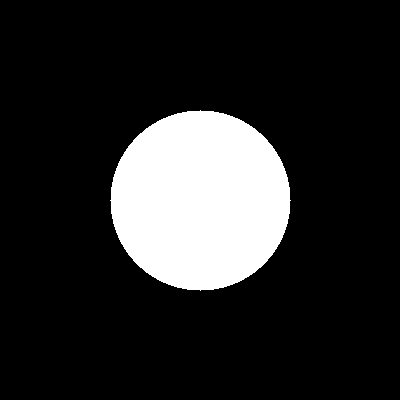

In [ ]:
cv2_imshow(circle)

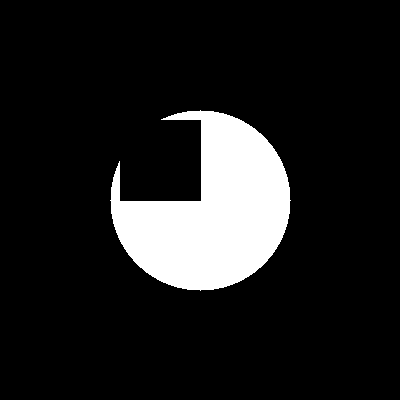

-1

In [ ]:
#bitwise and
bitwise_and=cv.bitwise_and(bitwisenot,circle)#Performs a pixel-wise AND operation between two images or an image and a mask. For each pixel, the result is 1 only if both corresponding pixels in the inputs are 1; otherwise, it's 0.
cv2_imshow(bitwise_and)
cv.waitKey(0)

In [ ]:

#bitwise or
bitwise_or=cv.bitwise_or(whiterect,circle)#Performs a pixel-wise OR operation between two images. For each pixel, the result is 1 if at least one of the corresponding pixels in the inputs is 1.
cv2_imshow(bitwise_or)
cv.waitKey(0)

MASKING

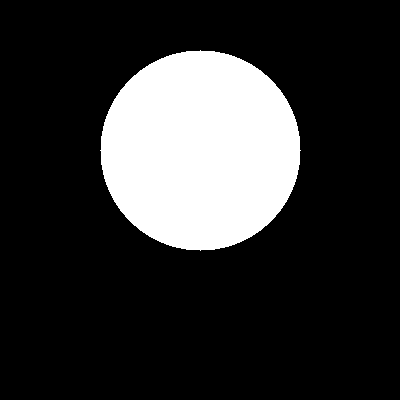

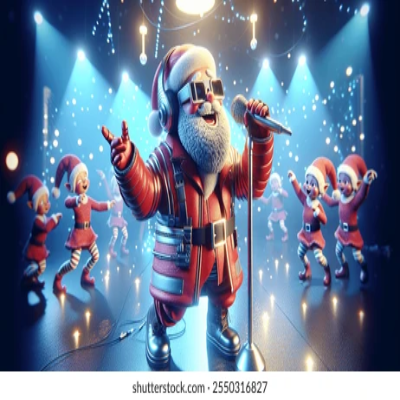

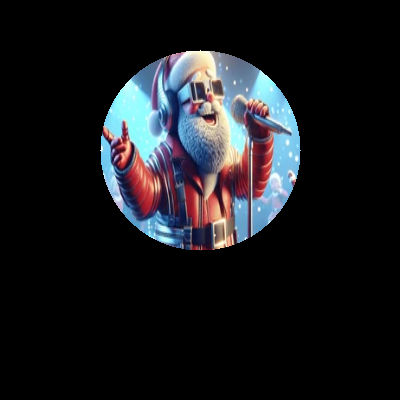

-1

In [ ]:
img=cv.imread("/content/masking.webp")
img=cv.resize(img,(400,400))
mask=cv.circle(blank.copy(),(200,150),100,255,-1)
cv2_imshow(mask)
cv2_imshow(img)
#creating a masked image
maskedim=cv.bitwise_and(img,img,mask=mask)
cv2_imshow(maskedim)
cv.waitKey(0)

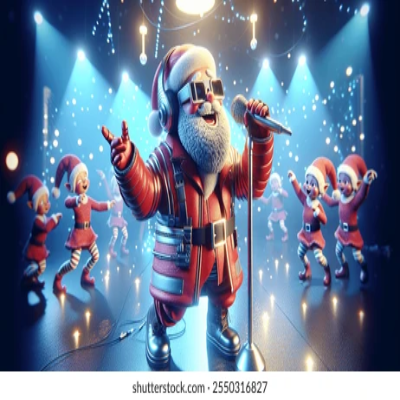

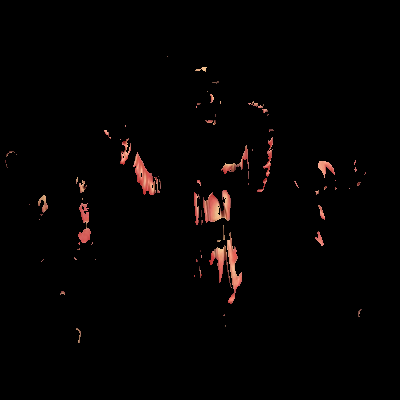

In [ ]:
img = cv.imread("/content/masking.webp")
img = cv.resize(img, (400, 400))

# Convert the image to HSV color space(inRange takes in HSV colour space)
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# Define the range for detecting red color in HSV space
lower_red = np.array([0, 100, 70])  # Lower bound for red
upper_red = np.array([20, 255, 255])  # Upper bound for red
mask = cv.inRange(hsv_img, lower_red, upper_red)
masked_img = cv.bitwise_and(img, img, mask=mask)
# original image
cv2_imshow(img)
# masked image
cv2_imshow( masked_img)
cv.waitKey(0)
cv.destroyAllWindows()


EDGE DETECTION(CANNY)

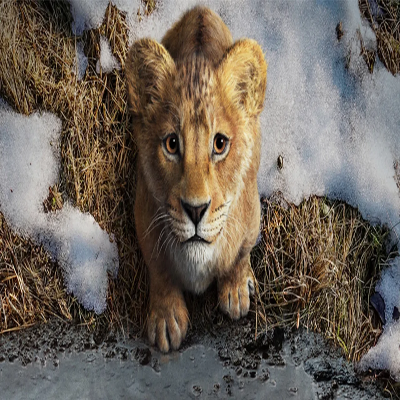

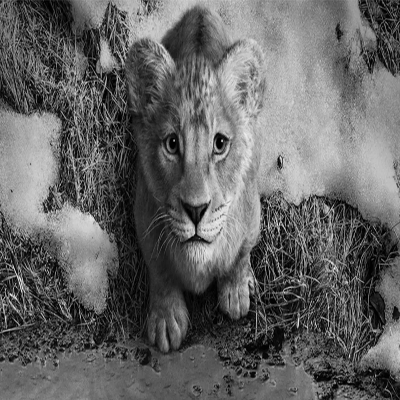

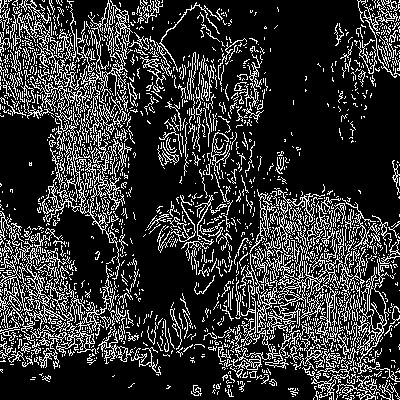

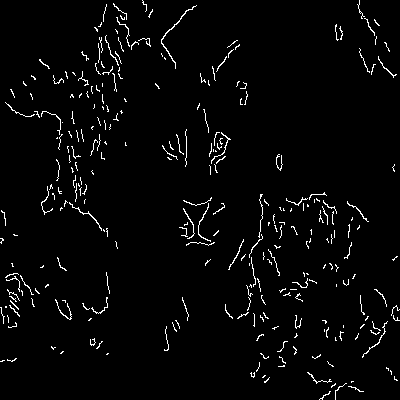

-1

In [ ]:
im2=cv.imread("/content/mufasa2.webp")
im2=cv.resize(im2,(400,400))
cv2_imshow(im2)
imgray=cv.cvtColor(im2,cv.COLOR_BGR2GRAY)
cv2_imshow(imgray)
#Gaussian Blur
blur=cv.GaussianBlur(imgray,(5,5),cv.BORDER_DEFAULT)#cv.GaussianBlur:Softens the image by reducing noise, making it look smoother by blending nearby pixels.
#edges
cannyclean=cv.Canny(blur,125,175)#cv.Canny:Finds edges in an image by detecting sharp changes in brightness, helping highlight boundaries or outlines.
cannynoisy=cv.Canny(imgray,125,175)
cv2_imshow(cannynoisy)
cv2_imshow(cannyclean)
cv.waitKey(0)

CONTOUR DETECTION

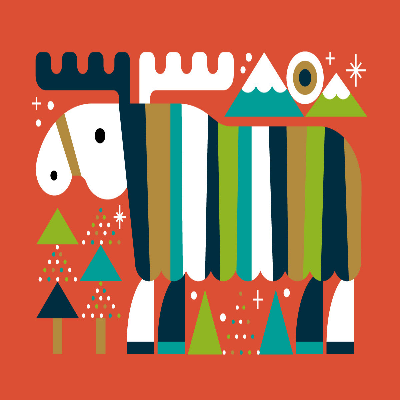

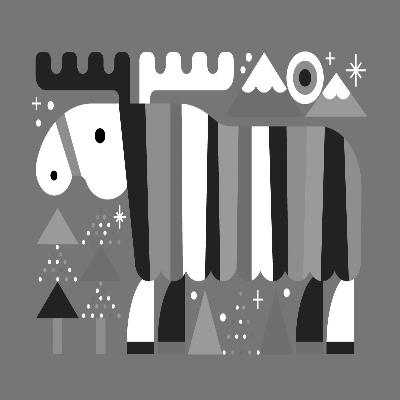

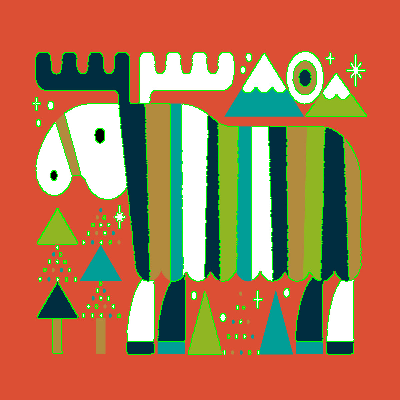

In [ ]:
im=cv.imread("/content/moose.jpg")
im=cv.resize(im,(400,400))
imgr=cv.cvtColor(im,cv.COLOR_BGR2GRAY)
cv2_imshow(im)
cv2_imshow(imgr)
#applying canny on gray image
canny=cv.Canny(imgr,50,150)
#finding contours works better on binary images like threshold and canny
contours,hierarchy=cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)#cv.findContours:Finds the outlines or shapes (called contours) in a binary image. These contours are like a list of points that form the boundary of objects in the image.
contoured=cv.drawContours(im,contours,-1,(0,255,0),1)#cv.drawContours:Draws the detected contours (shapes or outlines) on an image, using the list of points found by cv.findContours.
cv2_imshow(im)
#cv.waikey(0)